# Decision Trees Vs Random Forest Classification Model with Python

In [25]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
# improt the data
df = pd.read_csv('/home/nbuser/library/input_DS.csv')

In [27]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


Pairplot

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


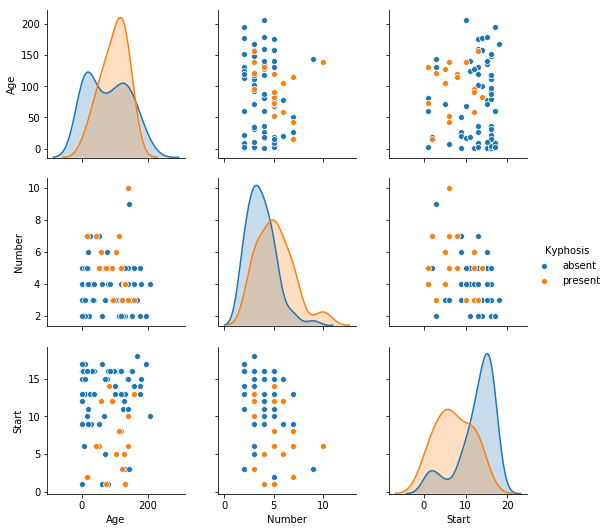

In [28]:
sns.pairplot(df,hue='Kyphosis')

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Decision Trees

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtree = DecisionTreeClassifier(criterion = 'entropy')

In [34]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Prediction and Evaluation

In [35]:
predictions = dtree.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [37]:
conf_matrix=confusion_matrix(y_test,predictions)
accuracy=accuracy_score(y_test,predictions)

In [38]:
conf_matrix,accuracy

(array([[15,  3],
        [ 2,  5]]), 0.8)

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.88      0.83      0.86        18
     present       0.62      0.71      0.67         7

   micro avg       0.80      0.80      0.80        25
   macro avg       0.75      0.77      0.76        25
weighted avg       0.81      0.80      0.80        25



In [40]:
print(confusion_matrix(y_test,predictions))

[[15  3]
 [ 2  5]]


Decision Tree Visualization

In [41]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

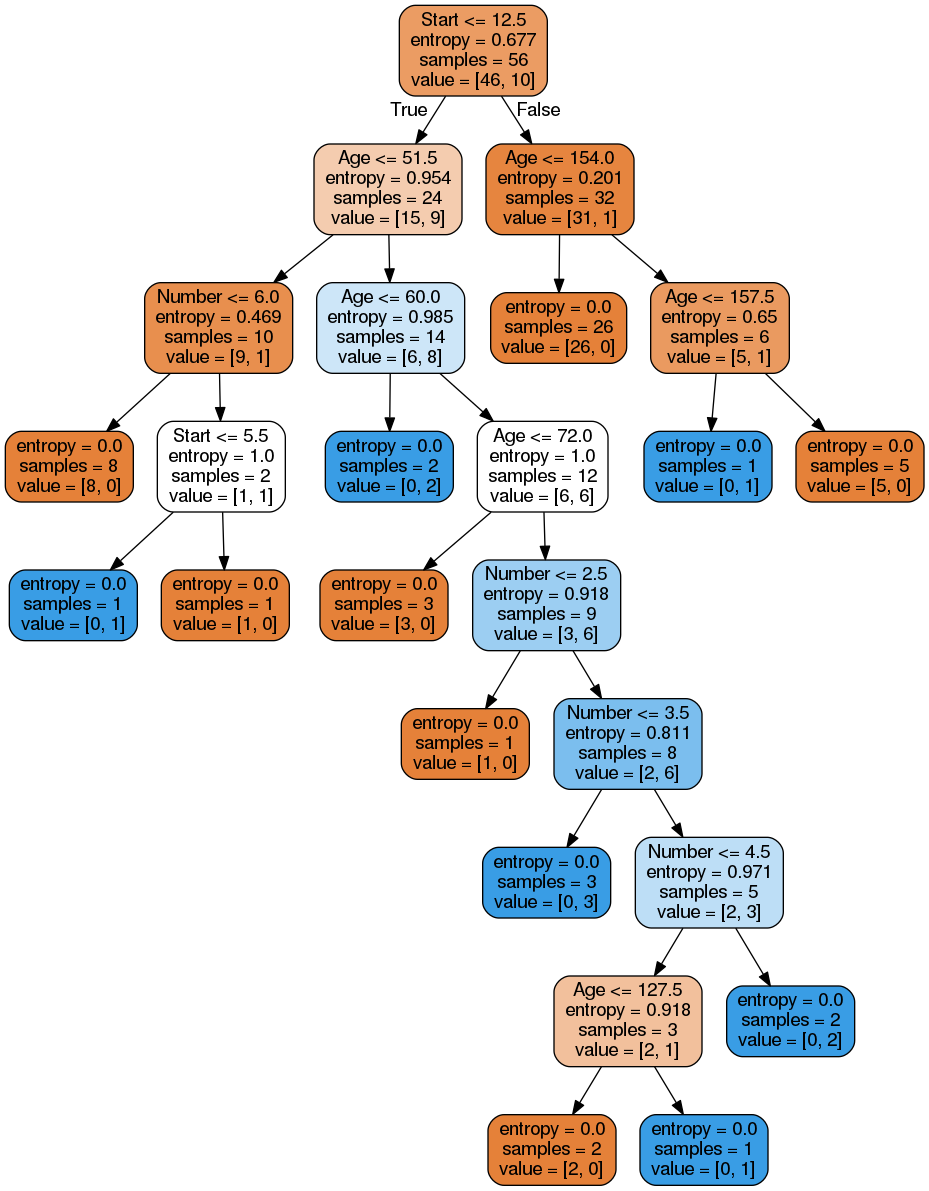

In [42]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

Compare decision tree model to a Random Forest model

In [43]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
rfc_pred = rfc.predict(X_test)

In [46]:
print(confusion_matrix(y_test,rfc_pred))

[[16  2]
 [ 3  4]]


In [47]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.84      0.89      0.86        18
     present       0.67      0.57      0.62         7

   micro avg       0.80      0.80      0.80        25
   macro avg       0.75      0.73      0.74        25
weighted avg       0.79      0.80      0.80        25

